# CAPM - Capital Asset Pricing Model

In [2]:
from scipy import stats
import pandas as pd
import pandas_datareader as web

In [6]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,198.210007,194.449997,195.009995,198.110001,141799700.0,179.871582
2016-03-02,199.059998,197.250000,197.740005,199.000000,102415000.0,180.679596
2016-03-03,199.800003,198.110001,198.789993,199.779999,95172200.0,181.387802
2016-03-04,201.350006,199.029999,200.009995,200.429993,129293600.0,181.977966
2016-03-07,201.070007,199.250000,199.339996,200.589996,100219000.0,182.123245


In [7]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2021-02-28')

In [12]:
spy_etf = web.DataReader('SPY','yahoo',start,end)

In [9]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

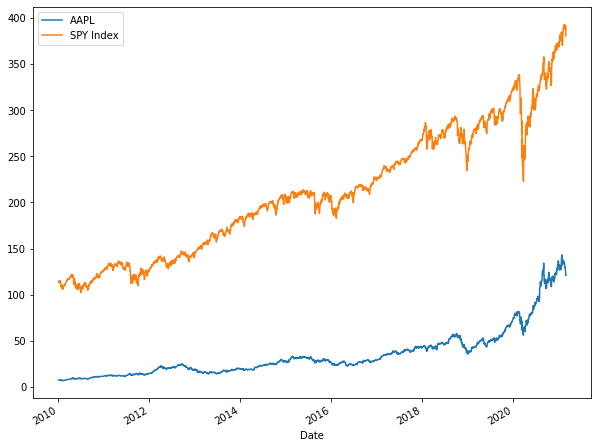

In [13]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [14]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

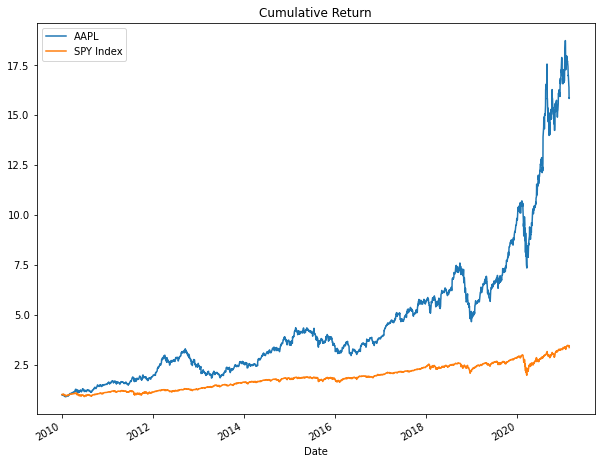

In [15]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

# Get Daily Return

In [16]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

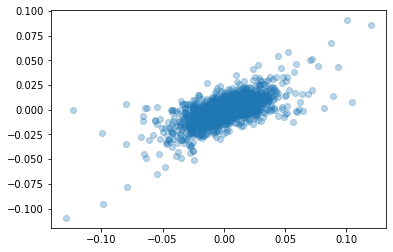

In [17]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

<AxesSubplot:>

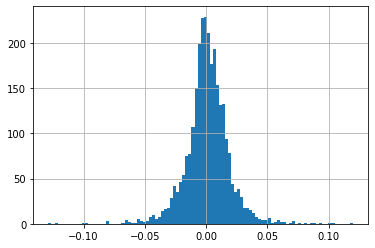

In [18]:
aapl['Daily Return'].hist(bins=100)

<AxesSubplot:>

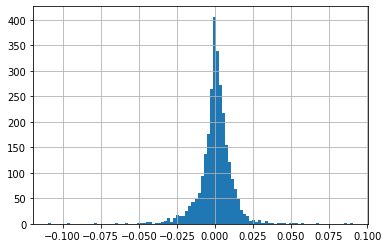

In [19]:
spy_etf['Daily Return'].hist(bins=100)

In [20]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [21]:
print(beta, alpha, r_value)

0.40121112300896244 3.16574807285153e-05 0.6581845654405347


In [22]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64